# Estimate Concrete Compressive Strength with ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('Concrete_Data.csv')
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [3]:
df.columns = ['Cement','BF','FA','W','SP','CA','FAgg','Age','Compr_Str']

In [4]:
df.describe()

,Cement,BF,FA,W,SP,CA,FAgg,Age,Compr_Str
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
# The data doesn't have any missing values
# The mean quantity of Cement is 281
# The mean quantity of Blast Furnance Slag is 73.89
# Water quantity the mean is 181.56
# Superplastizer mean is 6.2
# Coarse aggregate 972.92
# Fine agg 773.57

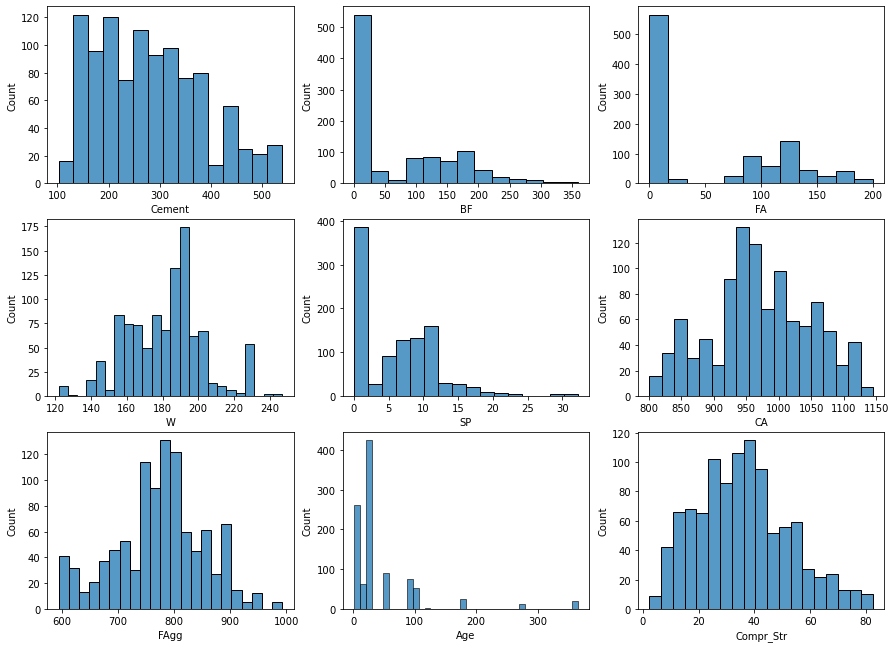

In [6]:
col = df.columns
plt.figure(figsize=(15,15))
for i in range(len(col)):
    plt.subplot(4,3,i+1)
    sns.histplot(x=df[col[i]])

In [7]:
# The Concrete Compressive Strength and the Cement tend to have a normal distribution
# The age, Fine Aggregate, Coarse Aggregate, Superplasticizer, Water,Fly Ash and Blast Furnance Slag distributions have many peak values. It could be a sign of outliers

<AxesSubplot:>

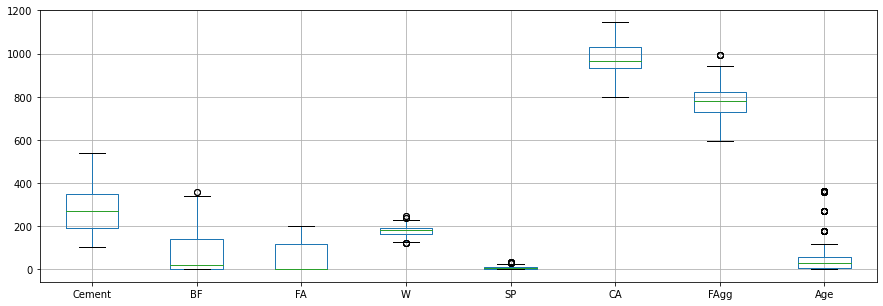

In [8]:
plt.figure(figsize=(15,5))
df.drop(['Compr_Str'],axis=1).boxplot()

In [9]:
# Here we concluded that some values are considered as outliers

In [10]:
df['W/C']=df['W']/df['Cement']

Text(0, 0.5, 'Compressive Strength (MPA)')

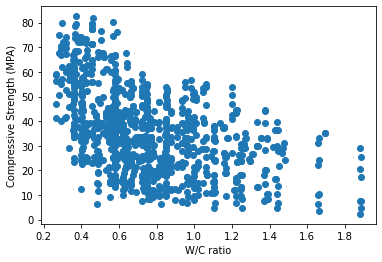

In [11]:
plt.scatter(df['W/C'],df['Compr_Str'])
plt.xlabel('W/C ratio')
plt.ylabel('Compressive Strength (MPA)')

We see that the more the ratio Water/Cement increasing, we are loosing compressive strength

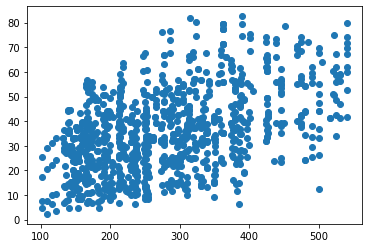

In [12]:
plt.scatter(df['Cement'],df['Compr_Str'])

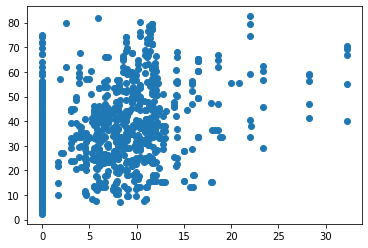

In [13]:
plt.scatter(df['SP'],df['Compr_Str'])

<AxesSubplot:>

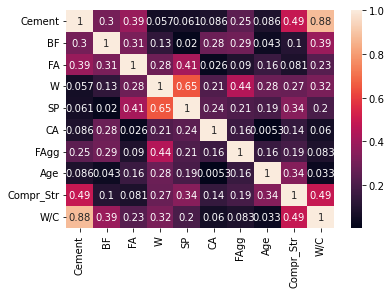

In [14]:
sns.heatmap(abs(df.drop_duplicates().corr()),annot=True)

## Model Building

In [15]:
df_ = df.drop_duplicates().copy()
#df_ = df_[df_['Age']<30]
#df_ = df_[df_['Age']>=7]
X = df_.drop(['Compr_Str','W/C'],axis=1)
y = df_['Compr_Str']

In [16]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler,PolynomialFeatures,FunctionTransformer,StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import SGDRegressor,Lasso
from sklearn.feature_selection import SelectFromModel

In [17]:
#def log_func(x):
#    y = np.log(abs(x)+1)
#    return y
from log import log_func
log_transformer = FunctionTransformer(func=log_func)
col_for_log = ['Age','BF','SP','FA','Cement'];
col_transformer=make_column_transformer((make_pipeline(log_transformer,RobustScaler(unit_variance=True)),col_for_log),
                                        (RobustScaler(unit_variance=True),['W','CA','FAgg']))

In [18]:
feature_selector = SelectFromModel(SGDRegressor(alpha=0.1,penalty='l1'),threshold='mean')
preprocessor = make_pipeline(col_transformer)#,feature_selector)

### Metrics: 

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.225,random_state=100)

In [20]:
from sklearn.metrics import mean_absolute_error,median_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

In [21]:
def evaluate_model(model,X_train=X_train,Y_train=Y_train,scoring=['r2']):
    for s in scoring:
        cv_score = cross_val_score(model,X_train,Y_train,scoring=s,cv=5)
        print(s+' mean_cv_score: ',cv_score.mean())
        #print(s+' std_cv_score: ',cv_score.std())

In [22]:
def plot_learning_curve(model,X_train=X_train,Y_train=Y_train,scoring='r2'):
    N,train_score,val_score = learning_curve(model,X_train,Y_train,train_sizes=np.arange(0.2,1+0.2,0.2),scoring=scoring)
    plt.plot(N,train_score.mean(axis=1),c='orange',label='train_score',scaley='autoscale_view')
    plt.plot(N,val_score.mean(axis=1),c='blue',label='val_score',scaley='autoscale_view')
    plt.title('Learning curves')
    plt.xlabel('Train size')
    plt.ylabel(scoring)
    print('Train Score: ',train_score.mean(axis=1)[-1])
    print('Val Score: ', val_score.mean(axis=1)[-1])
    plt.legend()

In [23]:
def optimize(model,grid,X_train=X_train,Y_train=Y_train,scoring='r2'):
    gs = GridSearchCV(model,param_grid=grid,scoring=scoring,cv=5,n_jobs=-1)
    gs.fit(X_train,Y_train)
    print('Best Score: ',gs.best_score_)
    print('Best Parameters',gs.best_params_)
    print('Retraining the model:\n ...')
    model = gs.best_estimator_
    return model

def error_ci(model,X_test,Y_test,err='se'):
    confidence=0.95
    if err=='ae':
        error = abs(model.predict(X_test)-Y_test)
        ci = stats.t.interval(confidence,len(error)-1,loc=np.mean(error))
    elif err=='se':
        error = (model.predict(X_test)-Y_test)**2
        ci = np.sqrt(stats.t.interval(confidence,len(error)-1,loc=np.mean(error)))
    else:
        error = (model.predict(X_test)-Y_test)**2
        ci = np.sqrt(stats.t.interval(confidence,len(error)-1,loc=np.mean(error)))
    return ci

# Training an SGDRegressor

In [24]:
from sklearn.ensemble import IsolationForest
isf = make_pipeline(preprocessor,StandardScaler(),MinMaxScaler(),IsolationForest(random_state=33,contamination=0.1))

In [25]:
non_outliers=isf.fit_predict(X_train,Y_train)==1

In [26]:
X_train = X_train[non_outliers]
Y_train = Y_train[non_outliers]

In [27]:
from sklearn.linear_model import SGDRegressor
sgd = make_pipeline(preprocessor,SGDRegressor(average=True,warm_start=True,max_iter=2000,random_state=33))
sgd.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline',
                                                                   Pipeline(steps=[('functiontransformer',
                                                                                    FunctionTransformer(func=<function log_func at 0x7f3620364a60>)),
                                                                                   ('robustscaler',
                                                                                    RobustScaler(unit_variance=True))]),
                                                                   ['Age', 'BF',
                                                                    'SP', 'FA',
                                                                    'Cement']),
                                                                  ('robustscaler',
                                   

Train Score:  0.7912398908917354
Val Score:  0.7837833898525458


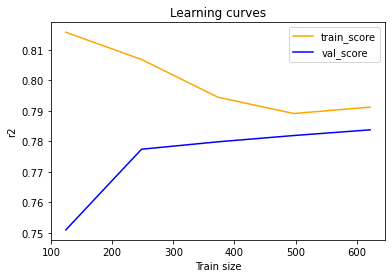

In [28]:
plot_learning_curve(sgd)

Best Score:  0.7837079401236853
Best Parameters {'sgdregressor__alpha': 0.01, 'sgdregressor__l1_ratio': 0.001}
Retraining the model:
 ...
Train Score:  0.7905337234479783
Val Score:  0.7838003759362099


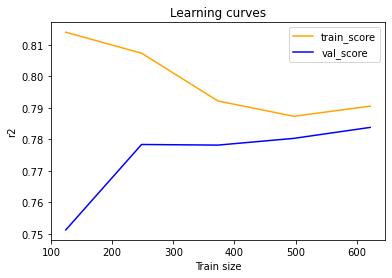

In [29]:
grid = {'sgdregressor__alpha':[0.000001,0.0001,0.01,0.1,0.3,0.7],
        'sgdregressor__l1_ratio':[0.001,0.01,0.5,0.9,1]
       }

sgd_new=optimize(sgd,grid=grid)
plot_learning_curve(sgd_new)

In [30]:
sgd_new.score(X_test,Y_test)

0.7840521750766574

# Training SVM

Train Score:  0.756394708844045
Val Score:  0.7432259157061021


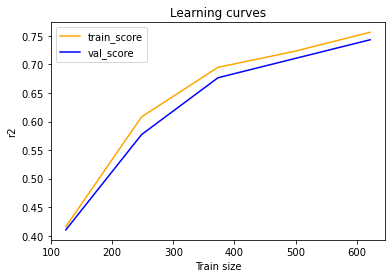

In [31]:
from sklearn.svm import SVR
svm = make_pipeline(preprocessor,SVR())
svm.fit(X_train,Y_train)
plot_learning_curve(svm)

Best Score:  0.8969588417028307
Best Parameters {'svr__C': 60, 'svr__epsilon': 1}
Retraining the model:
 ...
Train Score:  0.9466204068240233
Val Score:  0.8969230895064874


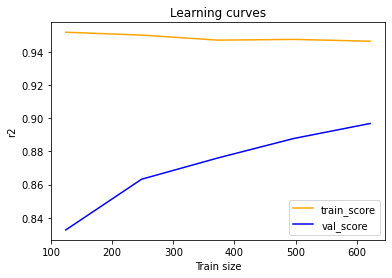

In [32]:
grid_svm = {'svr__C':[42,45,50,55,60,50],'svr__epsilon':[0.2,0.4,0.6,0.9,1,10]}
new_svm = optimize(svm,grid = grid_svm)
plot_learning_curve(new_svm)

In [33]:
new_svm.score(X_test,Y_test)

0.9140057530712283

In [34]:
from sklearn.ensemble import ExtraTreesRegressor,GradientBoostingRegressor
bgr = make_pipeline(preprocessor,GradientBoostingRegressor(n_estimators=65))
bgr.fit(X_train,Y_train)

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('columntransformer',
                                  ColumnTransformer(transformers=[('pipeline',
                                                                   Pipeline(steps=[('functiontransformer',
                                                                                    FunctionTransformer(func=<function log_func at 0x7f3620364a60>)),
                                                                                   ('robustscaler',
                                                                                    RobustScaler(unit_variance=True))]),
                                                                   ['Age', 'BF',
                                                                    'SP', 'FA',
                                                                    'Cement']),
                                                                  ('robustscaler',
                                   

Train Score:  0.9328360575468793
Val Score:  0.8826218333821144


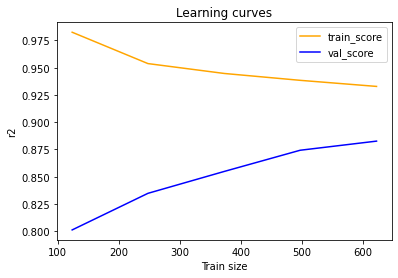

In [35]:
plot_learning_curve(bgr)

## Save Model

In [36]:
import joblib

In [37]:
joblib.dump(bgr,'apps/gbr.p')

['gbr.p']

In [38]:
error_ci(new_svm,X_test,Y_test,err='se')

array([4.70178277, 5.10370392])

# Results:

- The model built has 0.91 R² score on the new data set
- The RMSE for estimating the strength is about 4.7 to 5.1 MPa
- As W/C increase, the strength decrease